In [1]:
import pandas as pd
import numpy as np


In [2]:
wine = pd.read_csv('wine_data.csv')
wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
wine.shape


(177, 14)

In [5]:
column_names = [
    'class',
    'alcohol',
    'malic_acid',
    'ash',
    'alcalinity_of_ash',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'od280_od315',
    'proline'
]


In [6]:
wine.columns = column_names

In [7]:
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [8]:
X = wine.drop('class', axis=1)
y = wine['class']

In [9]:
X.describe()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()


In [12]:
X_scaled = scaler.fit_transform(X)


In [13]:
# formula used (x - mean) / standard deviation
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [14]:
X_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [15]:
X_scaled.mean()


alcohol                -5.218675e-16
malic_acid              2.810056e-16
ash                    -3.813647e-16
alcalinity_of_ash      -2.408619e-16
magnesium              -8.028731e-17
total_phenols          -2.810056e-16
flavanoids              1.605746e-16
nonflavanoid_phenols   -6.021549e-16
proanthocyanins        -4.014366e-17
color_intensity         1.806465e-16
hue                     6.021549e-16
od280_od315             7.225858e-16
proline                 1.605746e-16
dtype: float64

In [16]:
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [17]:
X_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [18]:
print("Before Standardization (Mean):")
print(X.mean())

print("\nAfter Standardization (Mean):")
print(X_scaled.mean())


Before Standardization (Mean):
alcohol                  12.993672
malic_acid                2.339887
ash                       2.366158
alcalinity_of_ash        19.516949
magnesium                99.587571
total_phenols             2.292260
flavanoids                2.023446
nonflavanoid_phenols      0.362316
proanthocyanins           1.586949
color_intensity           5.054802
hue                       0.956983
od280_od315               2.604294
proline                 745.096045
dtype: float64

After Standardization (Mean):
alcohol                -5.218675e-16
malic_acid              2.810056e-16
ash                    -3.813647e-16
alcalinity_of_ash      -2.408619e-16
magnesium              -8.028731e-17
total_phenols          -2.810056e-16
flavanoids              1.605746e-16
nonflavanoid_phenols   -6.021549e-16
proanthocyanins        -4.014366e-17
color_intensity         1.806465e-16
hue                     6.021549e-16
od280_od315             7.225858e-16
proline                 

In [19]:
print("Alcohol feature BEFORE:")
print(X['alcohol'].head())

print("\nAlcohol feature AFTER:")
print(X_scaled['alcohol'].head())


Alcohol feature BEFORE:
0    13.20
1    13.16
2    14.37
3    13.24
4    14.20
Name: alcohol, dtype: float64

Alcohol feature AFTER:
0    0.255824
1    0.206229
2    1.706501
3    0.305420
4    1.495719
Name: alcohol, dtype: float64


In [20]:
comparison = pd.DataFrame({
    'Before_Min': X.min(),
    'Before_Max': X.max(),
    'After_Min': X_scaled.min(),
    'After_Max': X_scaled.max()
})

comparison


,Before_Min,Before_Max,After_Min,After_Max
alcohol,11.03,14.83,-2.434746,2.276852
malic_acid,0.74,5.80,-1.433400,3.100048
ash,1.36,3.23,-3.668064,3.149233
alcalinity_of_ash,10.60,30.00,-2.680472,3.151249
magnesium,70.00,162.00,-2.093373,4.415790
total_phenols,0.98,3.88,-2.100648,2.541633
flavanoids,0.34,5.08,-1.690491,3.069345
nonflavanoid_phenols,0.13,0.66,-1.868993,2.394874
proanthocyanins,0.41,3.58,-2.065084,3.497023
color_intensity,1.28,13.00,-1.628565,3.427800


In [21]:
from sklearn.preprocessing import MinMaxScaler


In [22]:
minmax_scaler = MinMaxScaler()


In [23]:
X_minmax = minmax_scaler.fit_transform(X)


In [24]:
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)


In [25]:
X_minmax.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


In [26]:
print("Minimum values after Min-Max Scaling:")
print(X_minmax.min())

print("\nMaximum values after Min-Max Scaling:")
print(X_minmax.max())


Minimum values after Min-Max Scaling:
alcohol                 0.0
malic_acid              0.0
ash                     0.0
alcalinity_of_ash       0.0
magnesium               0.0
total_phenols           0.0
flavanoids              0.0
nonflavanoid_phenols    0.0
proanthocyanins         0.0
color_intensity         0.0
hue                     0.0
od280_od315             0.0
proline                 0.0
dtype: float64

Maximum values after Min-Max Scaling:
alcohol                 1.0
malic_acid              1.0
ash                     1.0
alcalinity_of_ash       1.0
magnesium               1.0
total_phenols           1.0
flavanoids              1.0
nonflavanoid_phenols    1.0
proanthocyanins         1.0
color_intensity         1.0
hue                     1.0
od280_od315             1.0
proline                 1.0
dtype: float64


In [27]:
print("Minimum values after Min-Max Scaling:")
print(X_minmax.min())

print("\nMaximum values after Min-Max Scaling:")
print(X_minmax.max())


Minimum values after Min-Max Scaling:
alcohol                 0.0
malic_acid              0.0
ash                     0.0
alcalinity_of_ash       0.0
magnesium               0.0
total_phenols           0.0
flavanoids              0.0
nonflavanoid_phenols    0.0
proanthocyanins         0.0
color_intensity         0.0
hue                     0.0
od280_od315             0.0
proline                 0.0
dtype: float64

Maximum values after Min-Max Scaling:
alcohol                 1.0
malic_acid              1.0
ash                     1.0
alcalinity_of_ash       1.0
magnesium               1.0
total_phenols           1.0
flavanoids              1.0
nonflavanoid_phenols    1.0
proanthocyanins         1.0
color_intensity         1.0
hue                     1.0
od280_od315             1.0
proline                 1.0
dtype: float64


In [28]:
import matplotlib.pyplot as plt


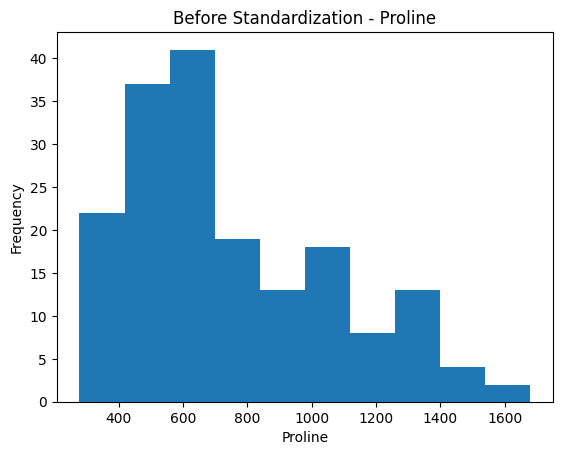

In [29]:
plt.figure()
plt.hist(X['proline'])
plt.title('Before Standardization - Proline')
plt.xlabel('Proline')
plt.ylabel('Frequency')
plt.show()


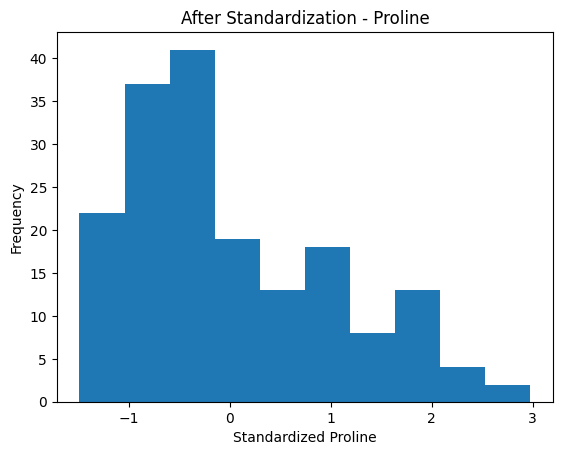

In [30]:
plt.figure()
plt.hist(X_scaled['proline'])
plt.title('After Standardization - Proline')
plt.xlabel('Standardized Proline')
plt.ylabel('Frequency')
plt.show()


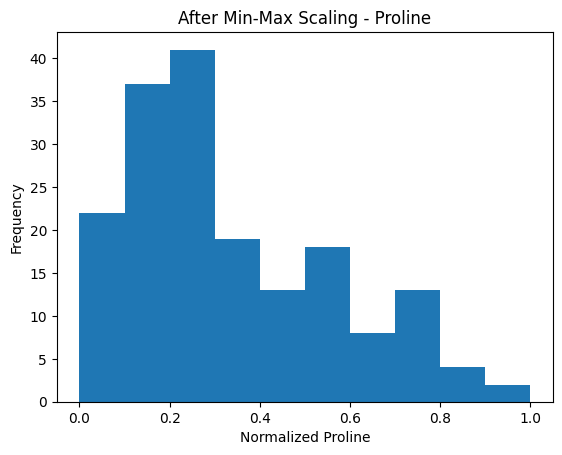

In [31]:
plt.figure()
plt.hist(X_minmax['proline'])
plt.title('After Min-Max Scaling - Proline')
plt.xlabel('Normalized Proline')
plt.ylabel('Frequency')
plt.show()


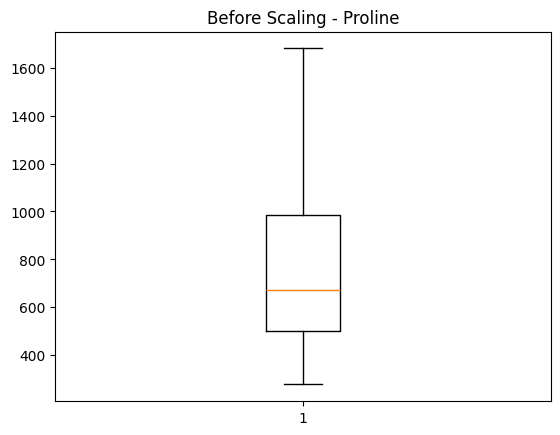

In [32]:
plt.figure()
plt.boxplot(X['proline'])
plt.title('Before Scaling - Proline')
plt.show()


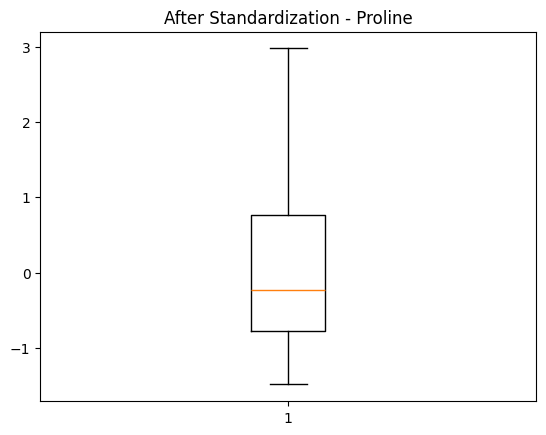

In [33]:
plt.figure()
plt.boxplot(X_scaled['proline'])
plt.title('After Standardization - Proline')
plt.show()


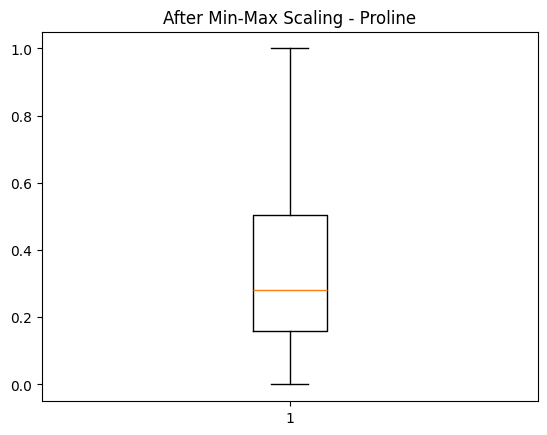

In [34]:
plt.figure()
plt.boxplot(X_minmax['proline'])
plt.title('After Min-Max Scaling - Proline')
plt.show()
